In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('train.csv')
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [3]:
a = [1,2,1,3,1,4,2,4,5,3]
print(set(a))

{1, 2, 3, 4, 5}


In [4]:
a = np.array(data['price_range'])
print(set(a))

{0, 1, 2, 3}


In [5]:
data['price_range'].value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

In [7]:
data_copy = data.copy()
data_copy

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


In [8]:
data_corr = data_copy.corr()
data_corr

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,-0.009952,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,-0.017143,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,-0.005598,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


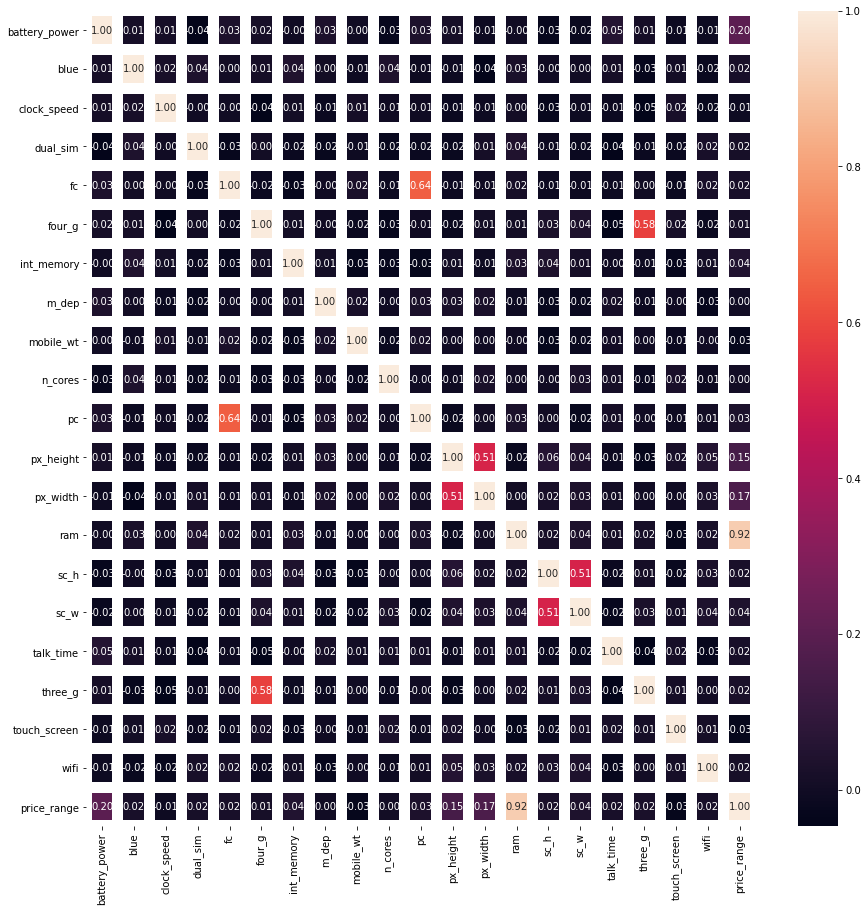

In [10]:
import seaborn as sns
plt.figure(figsize = (15,15))
sns.heatmap(data=data_corr, annot=True, fmt='.2f', linewidth = 10)

In [11]:
data_corr['price_range'].sort_values()

touch_screen    -0.030411
mobile_wt       -0.030302
clock_speed     -0.006606
m_dep            0.000853
n_cores          0.004399
four_g           0.014772
dual_sim         0.017444
wifi             0.018785
blue             0.020573
talk_time        0.021859
fc               0.021998
sc_h             0.022986
three_g          0.023611
pc               0.033599
sc_w             0.038711
int_memory       0.044435
px_height        0.148858
px_width         0.165818
battery_power    0.200723
ram              0.917046
price_range      1.000000
Name: price_range, dtype: float64

In [12]:
attributes = ['ram', 'price_range', 'battery_power', 'px_width' ,'px_height']

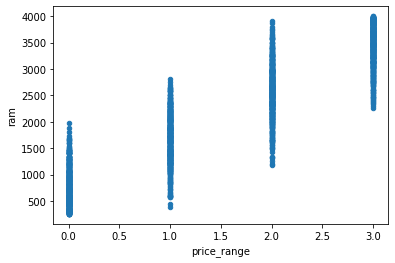

In [14]:
data.plot(kind = 'scatter', x='price_range', y = 'ram')

In [20]:
train_x = data_copy[attributes]
train_y = train_x['price_range']


In [33]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(train_x, test_size = 0.2, random_state=42)

In [34]:
train_set.shape

(1600, 5)

In [35]:
test_set.shape

(400, 5)

In [36]:
train_y = train_set['price_range']
del train_set['price_range']

In [37]:
test_y = test_set['price_range']
del test_set['price_range']

In [38]:
train_set.shape

(1600, 4)

In [39]:
test_set.shape

(400, 4)

In [40]:
train_y.shape

(1600,)

In [41]:
test_y.shape

(400,)

In [44]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=150)
knn.fit(train_set, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=150, p=2,
                     weights='uniform')

In [45]:
some_data = train_set.iloc[10:20]
some_labels = train_y.iloc[10:20]
print('예측 : ', knn.predict(some_data))
print('실제 답 : ', np.array(some_labels))

예측 :  [1 0 2 0 2 2 3 2 1 1]
실제 답 :  [2 0 1 0 2 2 3 2 1 1]


In [46]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=4)
tree_clf.fit(train_set, train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [47]:
some_data = train_set.iloc[10:20]
some_labels = train_y.iloc[10:20]
print('예측 : ', knn.predict(some_data))
print('실제 답 : ', np.array(some_labels))

예측 :  [1 0 2 0 2 2 3 2 1 1]
실제 답 :  [2 0 1 0 2 2 3 2 1 1]


In [49]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=5, random_state=42)
forest_clf.fit(train_set,train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [50]:
some_data = train_set.iloc[10:20]
some_labels = train_y.iloc[10:20]
print('예측 : ', knn.predict(some_data))
print('실제 답 : ', np.array(some_labels))

예측 :  [1 0 2 0 2 2 3 2 1 1]
실제 답 :  [2 0 1 0 2 2 3 2 1 1]


In [52]:
from sklearn.metrics import mean_squared_error

predictions = knn.predict(train_set)
knn_mse = mean_squared_error(train_y, predictions)
knn_mse = np.sqrt(knn_mse)
knn_mse

0.3152380053229623

In [53]:
from sklearn.metrics import mean_squared_error

predictions = tree_clf.predict(train_set)
tree_mse = mean_squared_error(train_y, predictions)
tree_mse = np.sqrt(tree_mse)
tree_mse

0.406201920231798

In [54]:
from sklearn.metrics import mean_squared_error

predictions = forest_clf.predict(train_set)
forest_mse = mean_squared_error(train_y, predictions)
forest_mse = np.sqrt(forest_mse)
forest_mse

0.11989578808281799

In [56]:
print('DecisionTree Accuracy(train) : ', tree_clf.score(train_set, train_y))
print('KNN Accuracy(train) : ', knn.score(train_set, train_y))
print('RandomForest Accuracy(train) : ', forest_clf.score(train_set, train_y))

DecisionTree Accuracy(train) :  0.835
KNN Accuracy(train) :  0.900625
RandomForest Accuracy(train) :  0.985625


In [57]:
print('DecisionTree Accuracy(train) : ', tree_clf.score(test_set, test_y))
print('KNN Accuracy(train) : ', knn.score(test_set, test_y))
print('RandomForest Accuracy(train) : ', forest_clf.score(test_set, test_y))

DecisionTree Accuracy(train) :  0.8
KNN Accuracy(train) :  0.9
RandomForest Accuracy(train) :  0.885
